In [52]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import os

# DATA MINING

In [7]:
# import dataset 
df = pd.read_csv('data/King_County_House_prices_dataset.csv')
original = df.copy()
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# DATA CLEANING

In [9]:
df.info()

#convert date to datetime format
df.date = pd.to_datetime(df.date,format='%m/%d/%Y')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [10]:
print(len(df[df.sqft_basement == '?']))
#change all values in sqft_basement to numeric format and non-numbers to
df['sqft_basement']= df.sqft_basement.replace('?',0)
df.sqft_basement = pd.to_numeric(df.sqft_basement, errors='coerce')

#fill NaN fields for waterfront, view and yr_renovated with zeros (which is the most likely default value)
df['waterfront'] = df['waterfront'].fillna(0)
df['view'] = df['view'].fillna(0)
df['yr_renovated'] = df['yr_renovated'].fillna(0)

#see if any NaN values are left in the dataset
df.isna().any()

454


id               False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

Generate the first logical features before visual data exploration

In [16]:
#clean yr_renovated to contain no values smaller that build date by creating new column with date of last modernization
df['last_modernization'] = [renovated if renovated > built else built for idx, built, renovated in df[['yr_built', 'yr_renovated']].itertuples()]

# DATA EXPLORATION

In [17]:
#create list of features
features = df.columns.drop('id')

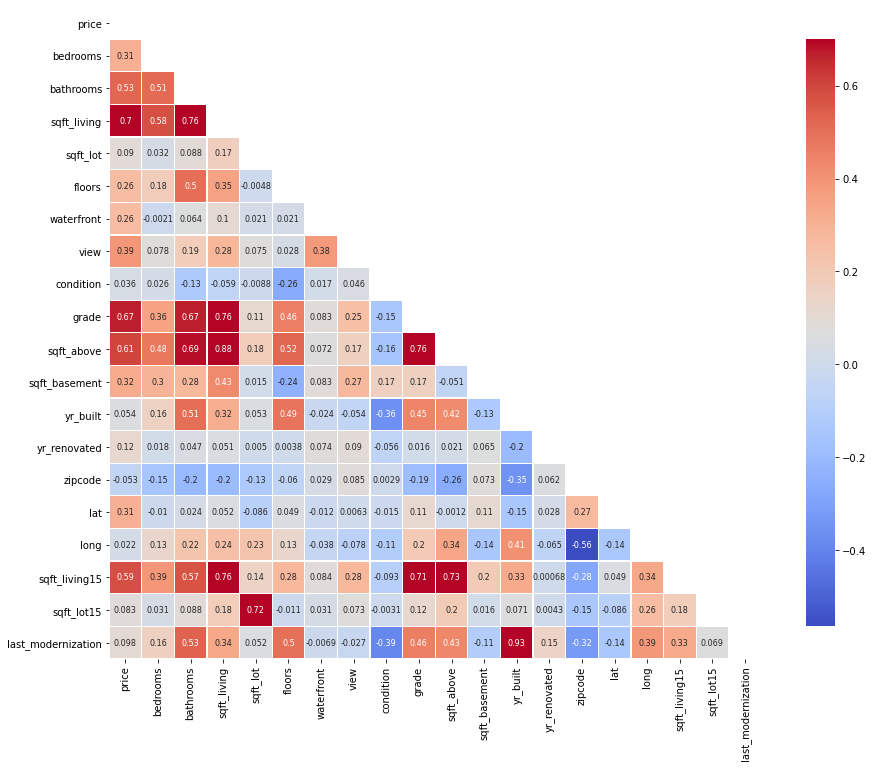

In [22]:
#create heatmap with correlations
X_dum=pd.get_dummies(df[features])
mask = np.triu(X_dum.corr())

fig, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap='coolwarm', #"BuGn_r" to reverse 
        linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});
plt.savefig('output/correlogram_1.png')

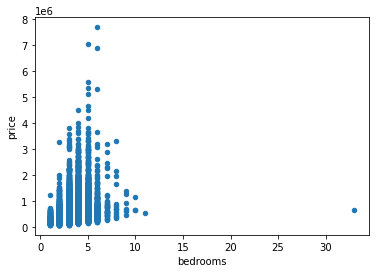

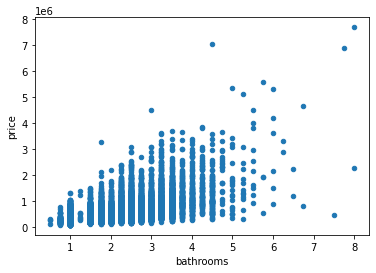

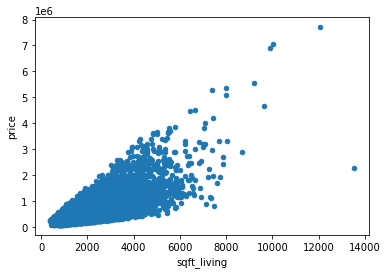

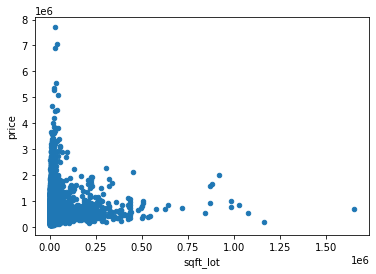

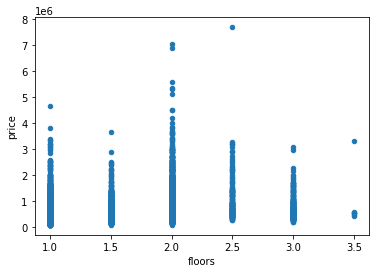

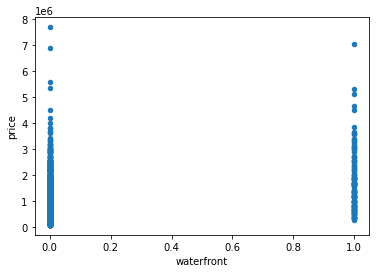

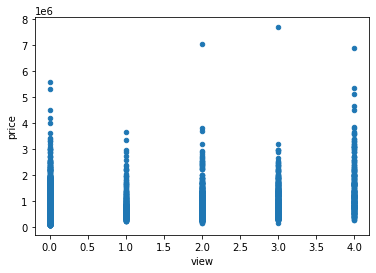

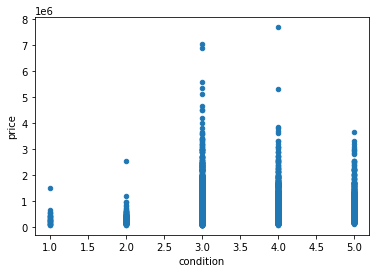

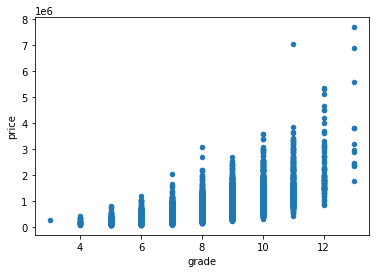

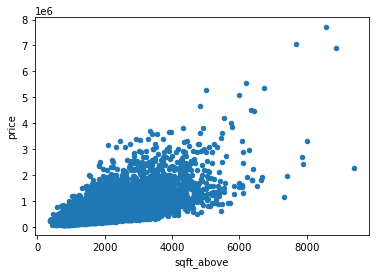

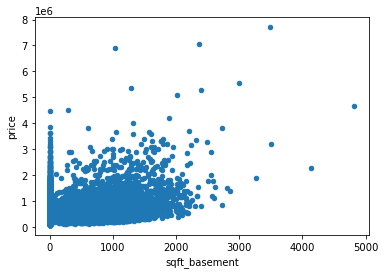

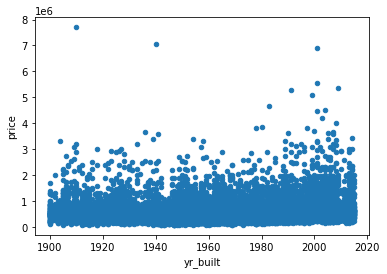

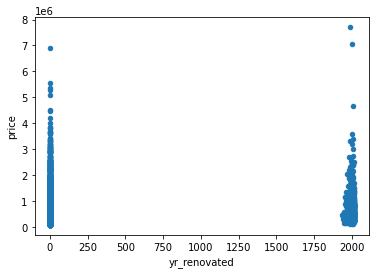

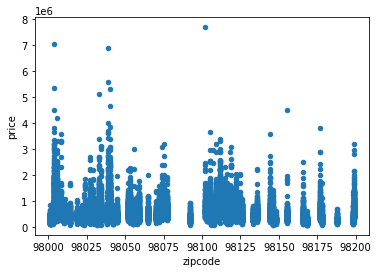

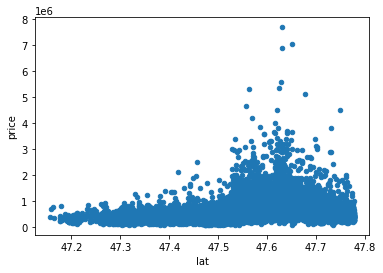

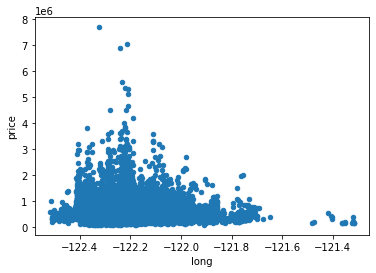

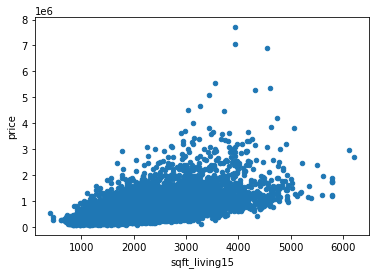

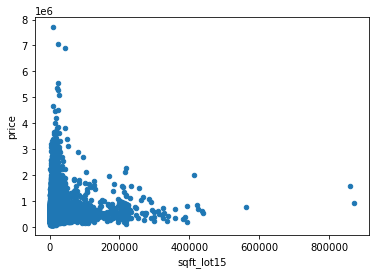

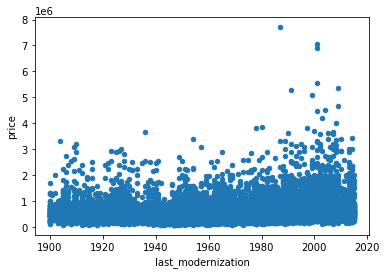

In [23]:
#plot scatterplot for price vs. each feature
for feature in df.columns.drop(['id','price','date']):
    df.plot(x= feature, y = 'price',kind='scatter')

In [24]:
#someone has more than 30 bedrooms - can that be right?
df.query('bedrooms > 30')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,last_modernization
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700,1947.0


In [25]:
#the 33 bedrooms seem to be a typo, because all other features appear average. we can assume someone wanted to type '3'
df['bedrooms'] = df.bedrooms.replace(33,3)

In [57]:
#can we find geographical clusters?
fig = px.scatter(df,x='lat',y='long',size='price',color='price')
fig.show()

In [ ]:
#sqft_living seems to have strong positive relation

#condition seems to be rather binary with < 3 and > 3 category

#grade seems to have a positive relationship

#some specific zipcodes seem to have negative effect on price

#latitude around 47.6 seems to lead to higher prices

#longitude around -122 seems to lead to higher prices

#last modernization seems to only have small effect on prices

In [27]:
#some zip codes seem to have extremely low prices. What are the zip code areas with lowest price per square foot?
df['price_per_sqft_above'] = df.price / df.sqft_above

cheapest_median_zips = df.groupby('zipcode').median().sort_values(['price_per_sqft_above']).price_per_sqft_above[:10]
expensive_median_zips = df.groupby('zipcode').median().sort_values(['price_per_sqft_above']).price_per_sqft_above.tail(10)

print('Families that want to get the most room for a dollar in King County should start looking at the following zipcode areas: ' + str(list(cheapest_median_zips.index)))

Families that want to get the most room for a dollar in King County should start looking at the following zipcode areas: [98092, 98002, 98030, 98001, 98023, 98042, 98003, 98038, 98031, 98022]


<AxesSubplot:xlabel='condition', ylabel='price_per_sqft_above'>

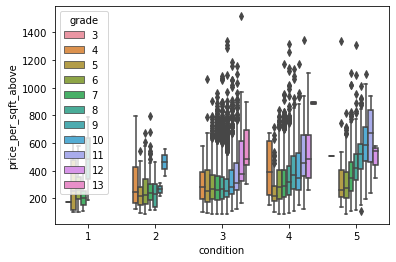

In [28]:
sns.boxplot(df.condition, df.price_per_sqft_above,hue = df.grade)

<AxesSubplot:xlabel='date', ylabel='price_per_sqft_above'>

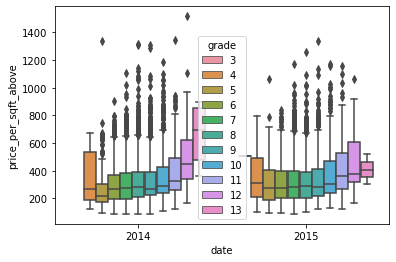

In [29]:
#if you wanted to buy high graded housing, 2015 would have been a better year than 2014
sns.boxplot(df.date.dt.year,df.price_per_sqft_above,hue = df.grade)

# FEATURE ENGINEERING

In [30]:
#add a column with the median price per squarefoot above
df['med_price_per_sqft_above_on_zipcode'] = [df[df.zipcode == zipcode]['price_per_sqft_above'].median() for zipcode in df.zipcode]

#calculate how many squarefeet the rooms have on average
df['rooms_per_sqft'] = (df.bedrooms + df.bathrooms) / df.sqft_living

#calculate how many bedrooms per squarefoot are there
df['bedrooms_per_sqft'] = df.bedrooms / df.sqft_living

#calculate how many bathroomy per squarefoot there are
df['bathrooms_per_sqft'] = df.bathrooms /df.sqft_living

#create lot to above ratio for individual home
df['lot_above_ratio'] = df.sqft_lot / df.sqft_above

#create lot to living ratio for individual home
df['lot_living_ratio'] = df.sqft_lot / df.sqft_living

#create lot to living ratio for nearest 15 neighbors
df['lot_living_ratio15'] = df.sqft_lot15 / df.sqft_living15

#calculate how many rooms you get for a dollar
df['bedrooms_per_dollar'] = df.bedrooms / df.price

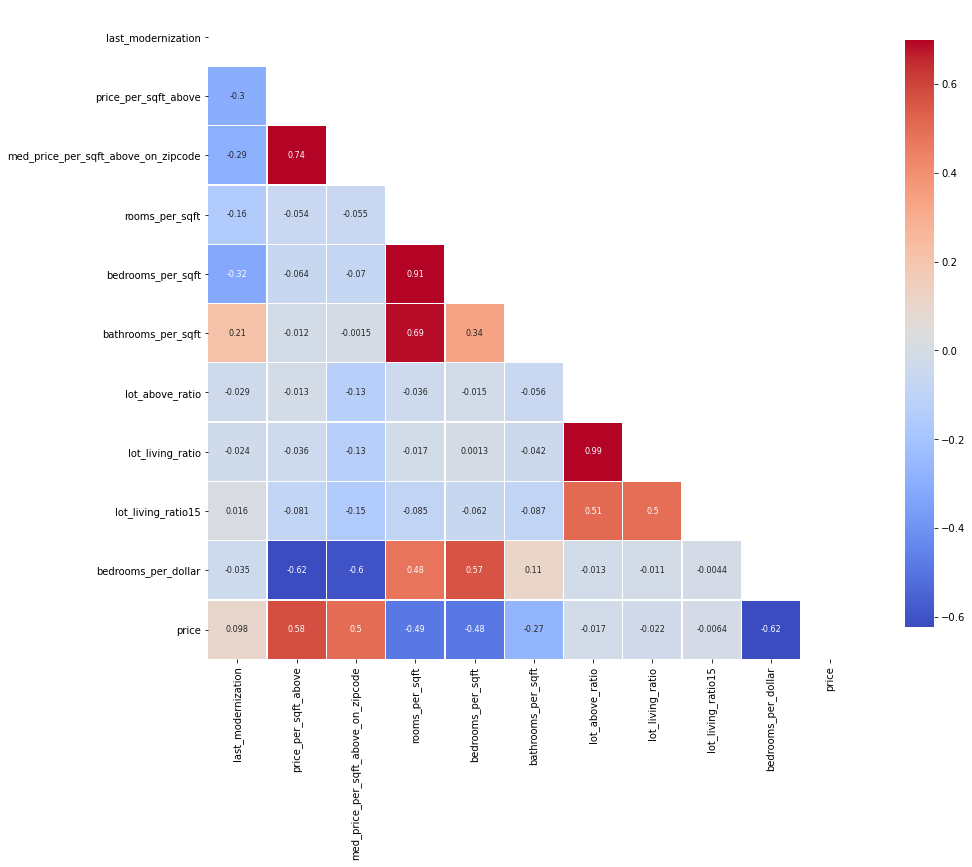

In [31]:
#create heatmap with correlations for the new features
new_features = list(df.columns)[-10:]
new_features.append('price')
X_dum=pd.get_dummies(df[new_features])
mask = np.triu(X_dum.corr())

fig, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(df[new_features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap='coolwarm', #"BuGn_r" to reverse 
        linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

The below code was a test to identify neighboring houses and their features. It just takes too long at the moment to run and must be optimized in the future

In [ ]:
'''
#write function to calculate distance between two points based on lat an long
import math    

def distance_km(origin, destination):
    """
    Calculate the Haversine distance.

    Parameters
    ----------
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    -------
    distance_in_km : float

    Examples
    --------
    >>> origin = (48.1372, 11.5756)  # Munich
    >>> destination = (52.5186, 13.4083)  # Berlin
    >>> round(distance(origin, destination), 1)
    504.2
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d
'''

In [ ]:
'''
#function to calculate average sqft price of the closest n houses
def closest_n(data, id_col, lat_col, lon_col, lat_float, lon_float, n=1):
    closest = {}
    for idx,lon,lat in data[[lon_col,lat_col]].itertuples():
        
        distance = distance_km((lat_float,lon_float),(data[lat_col][idx],data[lon_col][idx]))
        
        if data[lon_col][idx] == lon_float and data[lat_col][idx] == lat_float:
            continue
        elif len(closest) < n:
            closest[distance] = data[id_col][idx]
        elif distance < max(closest):
            closest.pop(max(closest),None)
            closest[distance] = data[id_col][idx]
    
    return closest
'''

In [ ]:
'''
df['nearest_neighbor'] = ''
for idx,key in enumerate(df.id):
    print(str((idx+1)/len(df)) + '% berechnet')
    neighbor = []
    neighbor.append(closest_n(df,'id','lat','long',df.lat[idx],df.long[idx]).values())
    df['nearest_neighbor'][idx] = neighbor
''' 

# PREDICTIVE MODELING

### Let's first try a multiple-linear regression approach

In [32]:
#import sklearn for regression analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [33]:
#set features and dependent variable for prediction
pred_features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'sqft_living15', 'sqft_lot15', 'last_modernization',
        'med_price_per_sqft_above_on_zipcode',
       'rooms_per_sqft', 'bedrooms_per_sqft', 'bathrooms_per_sqft',
       'lot_above_ratio', 'lot_living_ratio', 'lot_living_ratio15']

X = df[pred_features]
y = df['price']

In [34]:
#split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [35]:
single_models = {}
for best_predictor in pred_features:
    reg = LinearRegression()
    reg.fit(X_train[[best_predictor]], y_train)
    y_pred = reg.predict(X_test[[best_predictor]])
    single_models[np.sqrt(metrics.mean_squared_error(y_test, y_pred))] = best_predictor


In [36]:
# get more information on best performing models
best_predictors = [single_models[v] for v in sorted(single_models)]

In [37]:
# get more information on best performing models
best_predictors = [single_models[v] for v in sorted(single_models)]
for idx,best_predictor in enumerate(best_predictors[:8],1):
    reg = LinearRegression()
    reg.fit(X_train[[best_predictor]], y_train)
    y_pred = reg.predict(X_test[[best_predictor]])
    print(f'The {idx}. best predictor for houseprices seems to be {best_predictor}')
    print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
    print(f'RSquared: {metrics.r2_score(y_test, y_pred)}')
    print(f'Intercept: {reg.intercept_}')
    print(f'Coeff: {reg.coef_[0]}')
    print()

The 1. best predictor for houseprices seems to be sqft_living
RMSE: 249948.33791722165
RSquared: 0.4692872179032225
Intercept: -52451.322152426
Coeff: 285.14706587904107

The 2. best predictor for houseprices seems to be grade
RMSE: 254707.47709087515
RSquared: 0.44888474881967155
Intercept: -1081988.23046257
Coeff: 212075.442658366

The 3. best predictor for houseprices seems to be sqft_above
RMSE: 276231.62135993154
RSquared: 0.35180477653814546
Intercept: 53254.53101858054
Coeff: 272.84747157627095

The 4. best predictor for houseprices seems to be sqft_living15
RMSE: 277831.86701962166
RSquared: 0.3442728646419978
Intercept: -90001.11397461174
Coeff: 318.1090776304015

The 5. best predictor for houseprices seems to be med_price_per_sqft_above_on_zipcode
RMSE: 292319.1074569339
RSquared: 0.2741055945720391
Intercept: 23101.403840053303
Coeff: 1728.7176269049303

The 6. best predictor for houseprices seems to be bathrooms
RMSE: 293978.6987663806
RSquared: 0.26583991695946807
Intercep

In [38]:
#Test out combinations of best performing predictors
import itertools
combinations = []
for i in range(2,4):
    combinations.append((list(itertools.combinations(best_predictors[:-2],i))))

In [39]:
combination_results = {}
for co in combinations:
    for f in co:
        f = list(f)
        reg = LinearRegression()
        reg.fit(X_train[f], y_train)
        y_pred = reg.predict(X_test[f])
        combination_results[np.sqrt(metrics.mean_squared_error(y_test, y_pred))] = f

In [58]:
best_predictor_combinations

[['sqft_living', 'grade', 'yr_built'],
 ['sqft_living', 'grade', 'last_modernization'],
 ['grade', 'waterfront', 'yr_built'],
 ['sqft_living', 'grade', 'waterfront'],
 ['grade', 'bathrooms', 'yr_built'],
 ['sqft_living', 'grade', 'view'],
 ['grade', 'sqft_above', 'yr_built'],
 ['grade', 'view', 'yr_built'],
 ['grade', 'waterfront', 'last_modernization'],
 ['grade', 'sqft_living15', 'yr_built'],
 ['sqft_living', 'waterfront', 'yr_built'],
 ['grade', 'sqft_basement', 'yr_built'],
 ['grade', 'bathrooms', 'last_modernization'],
 ['grade', 'bedrooms_per_sqft', 'yr_built'],
 ['sqft_living', 'waterfront', 'last_modernization'],
 ['grade', 'view', 'last_modernization'],
 ['grade', 'rooms_per_sqft', 'yr_built'],
 ['sqft_living', 'view', 'waterfront'],
 ['grade', 'waterfront', 'sqft_basement'],
 ['sqft_living', 'view', 'yr_built'],
 ['sqft_living', 'grade', 'condition'],
 ['grade', 'sqft_above', 'last_modernization'],
 ['grade', 'sqft_basement', 'last_modernization'],
 ['sqft_living', 'bedrooms'

In [50]:
#get stats on the best predicting combination 
best_combi = combination_results[min(combination_results)]
reg = LinearRegression()
reg.fit(X_train[best_combi], y_train)
y_pred = reg.predict(X_test[best_combi])
print(f'Best performing features: {best_combi}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'RSquared: {metrics.r2_score(y_test, y_pred)}')
print(f'Intercept: {reg.intercept_}')
print(f'Coefficients: {reg.coef_}')

Best performing features: ['sqft_living', 'med_price_per_sqft_above_on_zipcode', 'waterfront']
RMSE: 168863.4681547436
RSquared: 0.757768593642087
Intercept: -497855.771377397
Coefficients: [2.66507067e+02 1.59391615e+03 8.39473633e+05]


In [41]:
#get the combinations that lead to best RSquared and exclude the feature for mean sqft price per zipcode
best_predictor_combinations = [combination_results[combi] for combi in sorted(combination_results) if 'med_price_per_sqft_above_on_zipcode' not in combination_results[combi]]

In [49]:
#get stats on the best predicting combination (excl. mean sqft price per zipcode)
best_combi = best_predictor_combinations[0]
reg = LinearRegression()
reg.fit(X_train[best_combi], y_train)
y_pred = reg.predict(X_test[best_combi])
print(f'Best performing features: {best_combi}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}')
print(f'RSquared: {metrics.r2_score(y_test, y_pred)}')
print(f'Intercept: {reg.intercept_}')
print(f'Coefficients: {reg.coef_}')

Best performing features: ['sqft_living', 'grade', 'yr_built']
RMSE: 217555.61416054296
RSquared: 0.5979318873131303
Intercept: 6319009.071937366
Coefficients: [   182.70931447 144080.29329806  -3684.31280489]


# DATA VISUALIZATION